**Créer son propre dataset, avec des images de personnages de Nintendo venant de google**

On prend 15 catégories de personnages: Mario, Luigi, Yoshi, Daisy, Donkey Kong, Captain Falcon, Waluigi, Fox, Link, Pikachu, Tiny Kong, Phoenix Wrigt, Harmonie, Professor Layton, et Toad

In [ ]:
from fastai.vision import *
from fastai import *

Après avoir choisi les images qu'on veut télécharger, on met la commande Javascript (urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));) ,après avoir exécuté un code Javascript dans votre navigateur qui enregistrera les URL de toutes les images que vous souhaitez pour votre jeu de données.

Dans Google Chrome appuyez sur CtrlShiftj sur Windows/Linux et CmdOptj sur macOS, et une petite fenêtre, la « console » javascript s’affiche. Dans Firefox appuyez sur CtrlShiftk sur Windows/Linux ou CmdOptk sur macOS. C’est là que vous collerez les commandes JavaScript.

Vous aurez besoin d’obtenir les URL de chacune des images. Avant d’exécuter les commandes suivantes, vous pouvez désactiver les extensions de blocage d’annonces (uBlock, AdBlockPlus, etc.) dans Chrome. Sinon, la commande window.open() ne fonctionne pas.

**Créer un fichier d’url d’annuaire et télécharger dans le serveur**

Choisissez un nom approprié pour vos images étiquetées. Vous pouvez exécuter ces étapes plusieurs fois pour créer différentes étiquettes. On répète l'action 15 fois.

In [ ]:
#Pour Mario
folder = 'Mario'
file = 'Mario.txt'

In [ ]:
#Pour Luigi
folder = 'Luigi'
file = 'Luigi.txt'

In [ ]:
#Pour Toad
folder = 'Toad'
file = 'Toad.txt'

In [ ]:
#Pour Yoshi
folder ='Yoshi'
file = 'Yoshi.txt'

In [ ]:
#Pour Daisy
folder ='Daisy'
file = 'Daisy.txt'

In [ ]:
#Pour Harmonie
folder ='Harmonie'
file = 'Harmonie.txt'

In [ ]:
#Pour Donkey Kong
folder ='Donkey Kong'
file = 'Donkey Kong.txt'

In [ ]:
#Pour Tiny Kong
folder ='Tiny Kong'
file = 'Tiny Kong.txt'

In [ ]:
#Pour Fox
folder ='Fox'
file = 'Fox.txt'

In [ ]:
#Pour Captain Falcon
folder ='Captain Falcon'
file = 'Captain Falcon.txt'

In [ ]:
#Pour Phoenix Wright
folder ='Phoenix Wright'
file = 'Phoenix Wright.txt'

In [ ]:
#Pour Waluigi
folder ='Waluigi'
file = 'Waluigi.txt'

In [ ]:
#Pour Pikachu
folder ='Pikachu'
file = 'Pikachu.txt'

In [ ]:
#Pour Link
folder ='Link'
file = 'Link.txt'

In [ ]:
#Pour Professor Layton
folder ='Professor Layton'
file = 'Professor Layton.txt'

On exécute cette cellule une fois par catégorie.

In [ ]:
path = Path('/content/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls() #Cela affiche le chemin menant aux fichiers

[PosixPath('/content/.config'),
 PosixPath('/content/Yoshi'),
 PosixPath('/content/Waluigi'),
 PosixPath('/content/Link'),
 PosixPath('/content/Yoshi.txt'),
 PosixPath('/content/Waluigi.txt'),
 PosixPath('/content/Phoenix Wright'),
 PosixPath('/content/Toad.txt'),
 PosixPath('/content/Daisy'),
 PosixPath('/content/Fox.txt'),
 PosixPath('/content/Mario.txt'),
 PosixPath('/content/Professor Layton.txt'),
 PosixPath('/content/Harmonie.txt'),
 PosixPath('/content/Tiny Kong.txt'),
 PosixPath('/content/Captain Falcon'),
 PosixPath('/content/Donkey Kong'),
 PosixPath('/content/Captain Falcon.txt'),
 PosixPath('/content/Luigi'),
 PosixPath('/content/Fox'),
 PosixPath('/content/Link.txt'),
 PosixPath('/content/Tiny Kong'),
 PosixPath('/content/Phoenix Wrigt'),
 PosixPath('/content/Donkey Kong.txt'),
 PosixPath('/content/Pikachu.txt'),
 PosixPath('/content/Harmonie'),
 PosixPath('/content/Phoenix Wright.txt'),
 PosixPath('/content/Toad'),
 PosixPath('/content/Mario'),
 PosixPath('/content/Pikach

Maintenant, on télécharge les images à partir de leurs URL respectives.

fast.ai a une fonction  permettant de le faire. Vous n’avez qu’à spécifier le nom de fichier urls ainsi que le dossier de destination et cette fonction va télécharger et enregistrer toutes les images qui peuvent être ouvertes. S’ils ont un problème à être ouvert, ils ne seront pas sauvés.

Téléchargeons nos images ! Notez que vous pouvez choisir un nombre maximum d’images à télécharger. Dans ce cas, nous ne téléchargerons pas toutes les URL.

Vous devrez exécuter cette ligne une fois pour chaque catégorie.

In [ ]:
classes = ['Mario', 'Luigi', 'Yoshi', 'Daisy', 'Donkey Kong', 'Captain Falcon', 'Waluigi', 'Fox', 'Link', 'Pikachu', 'Tiny Kong', 'Phoenix Wrigt', 'Harmonie', 'Professor Layton', 'Toad']

In [ ]:
download_images(path/file, dest, max_pics=200)

On télécharge les images pour chauqe fichier

Ensuite, nous pouvons supprimer toutes les images qui ne peuvent pas être ouvertes:

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500) # cela affiche les différents classes de personnages

Mario


Luigi


Yoshi


Daisy


Donkey Kong


Captain Falcon


Waluigi


Fox


Link


Pikachu


Tiny Kong


Phoenix Wrigt
Harmonie


Professor Layton


Toad


**Visualisation des données**

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [ ]:
data.classes #on aura les différentes classes (ici les 15 classes de professor)

['Captain Falcon',
 'Daisy',
 'Donkey Kong',
 'Fox',
 'Harmonie',
 'Link',
 'Luigi',
 'Mario',
 'Phoenix Wright',
 'Pikachu',
 'Professor Layton',
 'Tiny Kong',
 'Toad',
 'Waluigi',
 'Yoshi']

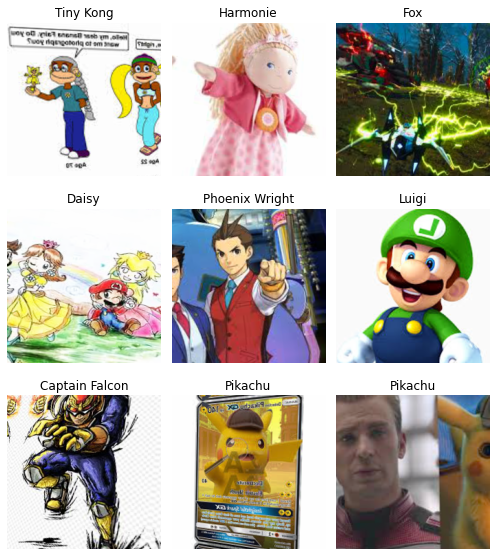

In [ ]:
data.show_batch(rows=3, figsize=(7,8)) #Cela va afficher quelques images des 15 catégories

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Captain Falcon',
  'Daisy',
  'Donkey Kong',
  'Fox',
  'Harmonie',
  'Link',
  'Luigi',
  'Mario',
  'Phoenix Wright',
  'Pikachu',
  'Professor Layton',
  'Tiny Kong',
  'Toad',
  'Waluigi',
  'Yoshi'],
 15,
 2378,
 594)

On obtient 15 classes , 2378 données pour le dataTrain et 594 données pour le data.valid. On a au total 2972 données.

**Entrainer le modèle**

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.843315,1.130838,0.326599,00:29
1,1.840738,0.992927,0.277778,00:28
2,1.368698,0.866436,0.267677,00:28
3,1.080021,0.853319,0.257576,00:28


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

On remarque que plus le nombre d'éléments est élevé, plus les valeurs (train-loss, valid_loss, error_rate) diminuent.

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze() # on débloque le modèle préentraîné pour pouvoir l'entraîner sur le dataset sur lequel on travaille dans le but de l'améliorer.

In [ ]:
learn.lr_find() # On calcule la fonction coût pour différents taux d'apprentissage (learning_rate). Cela permet par la suite de tracer le graphe de la fonction coût pour différentes valeurs du taux d'apprentissage. Il faut optimiser ce paramètre pour obtenir les meilleures performances sur le modèle. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


On remarque que le train_loss a une valeur variable en fonction du nombre de couches("epoch"). On observe aucune valeurs pour les autres paramètres. Seulement 2 couches ont été retenues.

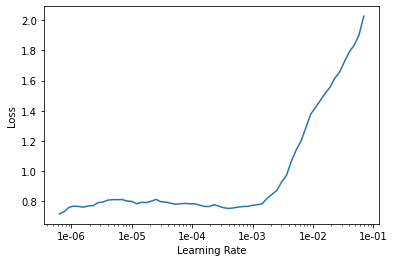

In [ ]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

D'après ce graphique, on remarque la fonction coût a tendance à augmenter progressivement, puis à atteindre une valeur très élevée (jusqu'à atteindre la valeur de 2.0), en fonction du taux d'apprentissage.

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.775899,0.773150,0.210438,00:28
1,0.589610,0.721071,0.202020,00:28


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

On remarque qu'on obtient un taux d'erreur à 0,32 contre un d'environ 0,2. Ce qui signifie que le modèle deveint plus performant avec la méthode unfreezing.

In [ ]:
learn.save('stage-2')

**Interprétation des résultats**

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

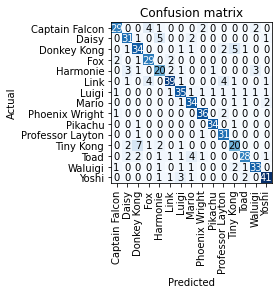

In [ ]:
interp.plot_confusion_matrix()

On crée la matrice de confusion. On remarque qu'il existe une proximité entre plusieurs classes.

**Nettoyage des données**

In [ ]:
from fastai.widgets import *

D’abord, il faut obtenir les chemins de fichiers de nos top_losses. On peut le faire avec .from_toplosses. Nous alimentons ensuite les principaux index de pertes et le jeu de données correspondant à ImageCleaner.

Le widget ne supprimera pas les images directement du disque, mais il va créer un nouveau fichier csv cleaned.csv à partir de l’endroit où on peut créer un nouveau ImageDataBunch avec les étiquettes corrigées pour continuer à former le modèle.

Afin de nettoyer l’ensemble des images, nous devons créer un nouveau jeu de données sans la scission. La conférence vidéo a démostré l’utilisation du ds_type param qui n’a plus aucun effet.

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

Ensuite, nous créons un nouvel apprenant pour utiliser notre nouveau databunch avec toutes les images.

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
ImageCleaner(ds, idxs, path) 
#Avec cette commande , on obtient plusieurs images (non nécessaires) qu'on peut supprimer, et observer le chemin de chaque image. 

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


Avec cette commande, on peut formater les images

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True) 
# Avec cette commande , on observe des images similaires que l'on peut supprimer

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

**Mettre le modèle en production**

Exportons le contenu de notre objet Learringer pour la production :

In [ ]:
learn.export()

Cela créera un fichier nommé 'export.pkl' dans le répertoire où nous travaillions qui contient tout ce dont nous avons besoin pour déployer notre modèle (le modèle, les poids mais aussi certaines métadonnées comme les classes ou les transformations/normalisation utilisées).

On veut probablement utiliser CPU pour l’inférence, sauf à l’échelle massive (et vous n’avez presque certainement pas besoin de s’entraîner en temps réel). Si vous n’avez pas de GPU qui se produit automatiquement. On teste le modèle sur CPU comme ainsi:

In [ ]:
defaults.device = torch.device('cpu')

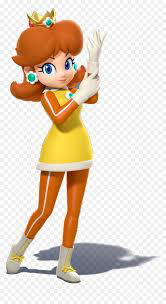

In [ ]:
img = open_image(path/'Daisy'/'00000006.jpg')
img

Ici, on obtient un image de Daisy avec la commande précédente.
On peut faire la même chose avec d'autres personnages.

Nous créons notre Learringer dans la production envier comme ceci, assurez-vous juste que le chemin contient le fichier 'export.pkl' d’avant.

In [178]:
learn = load_learner(path)

In [179]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'Daisy'

Avec cette commande , on a créé un chemin semblable à ceci :
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })

**Taux d'apprentissage trop élévé**

In [180]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [181]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,32.933735,60697340.000000,0.930815,00:18


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

On remarque que le taux d'erreur est de 0.930815.

**Taux d'apprentissage trop bas**

In [182]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [183]:
learn.fit_one_cycle(5, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,4.144998,3.682605,0.927076,00:18
1,4.220938,3.263869,0.925580,00:18
2,4.201699,3.217738,0.922962,00:18
3,4.135720,3.205594,0.917352,00:18
4,4.066964,3.208670,0.913987,00:18


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

Avec  le taux d'apprentissage trop bas, on passe de 0.927076 à 0.913987.
Cela montre que le modèle est très faible





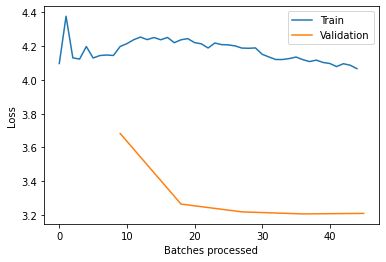

In [184]:
learn.recorder.plot_losses()

D'après ce graphique, on remarque que le "train_loss" possède les plus grands nombres de pertes en fonction des Batches, par rapport au taux de validation.

**Trop peu de couches**

In [185]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [186]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,4.254443,4.014535,0.920718,00:18


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

Le taux d'erreur est de 0.920718 proche de ce qui a été retenu précédemment, avant de réaliser le modèle avec la méthode unfreeze. 

**Trop de catégories**

In [187]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [188]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [189]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3.578092,3.497662,0.936425,00:20
1,3.478018,3.237208,0.924084,00:20
2,3.371660,3.150445,0.902019,00:20
3,3.161241,2.952656,0.857143,00:21
4,2.906965,2.676969,0.789454,00:20
5,2.590298,2.381414,0.715408,00:20
6,2.257173,2.139478,0.633134,00:20
7,1.918022,1.975548,0.576290,00:21
8,1.626475,1.877515,0.547868,00:20
9,1.357690,1.829679,0.532910,00:21


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

On remarque les mêmes résultats que lors de la première partie. Plus le nombre d'epochs est élevé, plus les valeurs pour les 3 valeurs (train_loss	valid_loss	error_rate) ont tendance à diminuer. Cependant, on observe une variation de valeurs pour le taux d'erreurs.On en déduit que le modèle est très performant.